In [277]:
import xml.etree.ElementTree as ET
import pandas as pd
from conda.instructions import PRINT

In [278]:
# Load the XML file
tree = ET.parse('data_folder_xDD/drugbank_copy_pasted.xml')
root = tree.getroot()

In [279]:
# Use the namespace to access elements
ns = {'ns': 'http://www.drugbank.ca'}

In [280]:
# Define a list to hold the data
drugs = []

for drug in root:

    row = {
        'id': drug.find('ns:drugbank-id', ns).text,
        'name': drug.find('ns:name', ns).text,
        'description': drug.find('ns:description', ns).text,
        'state': drug.find('ns:state', ns).text,
        'indication': drug.find('ns:indication', ns).text, # wskazania = indications
        'mechanism-of-action': drug.find('ns:mechanism-of-action', ns).text, # mechanizm działania leku = mechanism of action of the drug
        'food-interactions': [
            interaction.text.strip()
            for interaction in drug.find('ns:food-interactions', ns).iter()
            if interaction.text and interaction.text.strip()    # iterate over non-empty interactions in order to remove unnecessary "\n "
        ] if (len(drug.find('ns:food-interactions', ns)) > 0) else None # if there are no food interactions we simply return "None" instead of "[]"
    }
    drugs.append(row)

drugs_df = pd.DataFrame(drugs).set_index('id')
drugs_df # (1) done

,name,description,state,indication,mechanism-of-action,food-interactions
id,,,,,,
DB00001,Lepirudin,Lepirudin is a recombinant hirudin formed by 6...,solid,Lepirudin is indicated for anticoagulation in ...,Lepirudin is a direct thrombin inhibitor used ...,[Avoid herbs and supplements with anticoagulan...
DB00002,Cetuximab,Cetuximab is a recombinant chimeric human/mous...,liquid,Cetuximab indicated for the treatment of local...,The epidermal growth factor receptor (EGFR) is...,None
DB00003,Dornase alfa,Dornase alfa is a biosynthetic form of human d...,liquid,Used as adjunct therapy in the treatment of cy...,Dornase alfa is a biosynthetic form of human D...,None
DB00004,Denileukin diftitox,A recombinant DNA-derived cytotoxic protein co...,liquid,For treatment of cutaneous T-cell lymphoma,Denileukin diftitox binds to the high-affinity...,None
DB00005,Etanercept,Dimeric fusion protein consisting of the extra...,liquid,Etanercept is indicated for the treatment of m...,There are two distinct receptors for TNF (TNFR...,None
...,...,...,...,...,...,...
DB00104,Octreotide,Acromegaly is a disorder caused by excess grow...,solid,Octreotide by injection is used for the treatm...,Octreotide binds to somatostatin receptors cou...,[Take on an empty stomach. The oral capsules s...
DB00105,Interferon alfa-2b,Interferon alpha 2b (human leukocyte clone hif...,liquid,"For the treatment of hairy cell leukemia, mali...",Interferon alpha binds to type I interferon re...,[Avoid alcohol.]
DB00106,Abarelix,Synthetic decapeptide antagonist to gonadotrop...,solid,For palliative treatment of advanced prostate ...,Abarelix binds to the gonadotropin releasing h...,None


In [281]:
synonyms = []

for drug in root:

    row = {
        'id': drug.find('ns:drugbank-id', ns).text,
        'name': drug.find('ns:name', ns).text, # this might be redundant
        'synonyms': [
            synonym.text.strip()
            for synonym in drug.find('ns:synonyms', ns).iter()
            if synonym.text and synonym.text.strip()
        ]
    }
    synonyms.append(row)

synonyms = pd.DataFrame(synonyms)
synonyms = synonyms.set_index('id')
synonyms

,name,synonyms
id,,
DB00001,Lepirudin,"[[Leu1, Thr2]-63-desulfohirudin, Desulfatohiru..."
DB00002,Cetuximab,"[Cetuximab, Cétuximab, Cetuximabum]"
DB00003,Dornase alfa,[Deoxyribonuclease (human clone 18-1 protein m...
DB00004,Denileukin diftitox,"[Denileukin, Denileukin diftitox, Interleukin-..."
DB00005,Etanercept,"[Etanercept, etanercept-szzs, etanercept-ykro,..."
...,...,...
DB00104,Octreotide,"[Octreotida, Octreotide, Octreotidum, Octrotide]"
DB00105,Interferon alfa-2b,"[Interferon alfa-2b, Interferon alfa-2b (recom..."
DB00106,Abarelix,[Abarelix]


In [282]:
import networkx as nx
import matplotlib.pyplot as plt

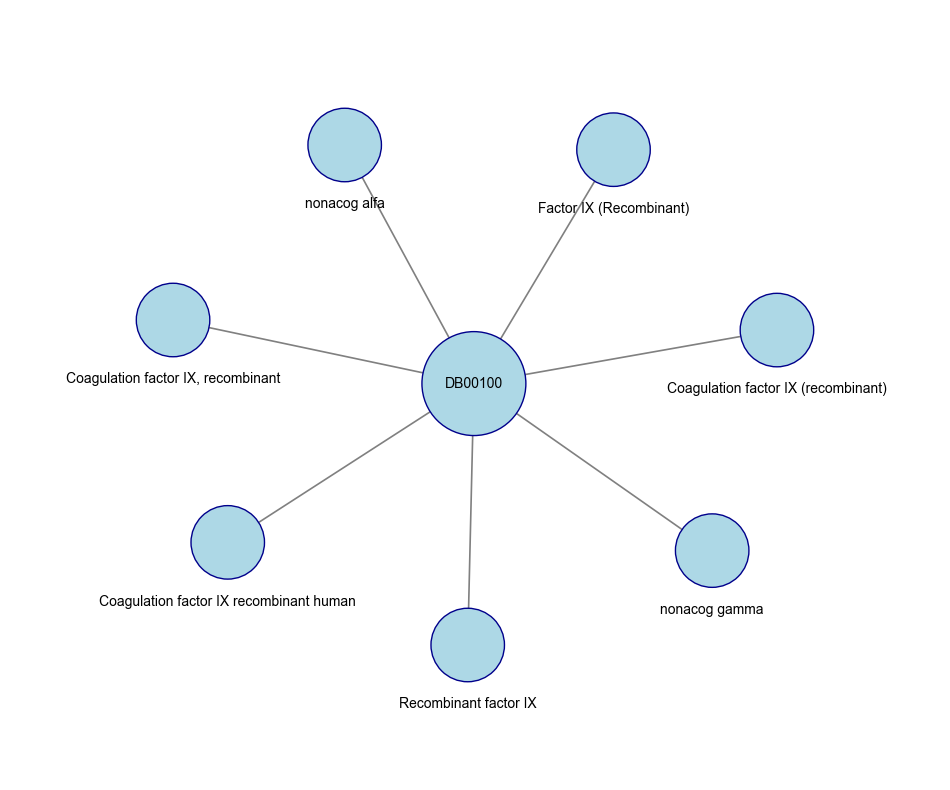

In [283]:
def draw_synonyms(drug_bank_id):
    syns = synonyms.loc[drug_bank_id, 'synonyms']
    edge_list = [(drug_bank_id, syn) for syn in syns]
    G = nx.from_edgelist(edge_list)

    pos = nx.spring_layout(G, k=1, seed=42)

    # node sizes
    central_size = len(drug_bank_id) * 800
    node_sizes = [central_size if node == drug_bank_id else central_size/2 for node in G]

    # drawing nodes and edges
    plt.figure(figsize=(12, 10))  # Larger area for better readability
    nx.draw_networkx_edges(G, pos, edge_color="gray", width=1.2)
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="lightblue", edgecolors="darkblue")

    # labeling the central node (in the middle of the node):
    nx.draw_networkx_labels(
        G,
        {drug_bank_id: pos[drug_bank_id]},  # Only the central node
        {drug_bank_id: drug_bank_id},
        font_size=10,
        verticalalignment="center"
    )

    # labeling other nodes (under the nodes):

    # first we shift the position of other nodes down by 0.2 of an inch
    shifted_pos = {node: (x, y-0.2) for node, (x, y) in pos.items() if node != drug_bank_id}
    nx.draw_networkx_labels(
        G,
        shifted_pos,
        labels={node: node for node in shifted_pos},
        font_size=10,
        verticalalignment="top"
    )

    # showing the graph
    plt.axis("off")
    plt.margins(0.2)
    plt.show()

draw_synonyms('DB00100') # (2) done better ?

By the logic of Duck Typing if it looks like a duck swims like a duck and quacks like a duck it's a duck. So if it's a product containing the same drug under the same name ... \
actually nvm lets just leave the national drug code product code blank if its blank. \
*"G" - k3soju*

In [284]:
products = []

for drug in root:
    for product in drug.find('ns:products', ns):
        row = {
            'id': drug.find('ns:drugbank-id', ns).text,
            'name': product.find('ns:name', ns).text,
            'labeller': product.find('ns:labeller', ns).text,
            'ndc-product-code': product.find('ns:ndc-product-code', ns).text,
            'dosage-form': product.find('ns:dosage-form', ns).text,
            'route': product.find('ns:route', ns).text,
            'strength': product.find('ns:strength', ns).text,
            'country': product.find('ns:country', ns).text,
            'source': product.find('ns:source', ns).text
        }
        products.append(row)

products = pd.DataFrame(products)

products # (3) done ?

,id,name,labeller,ndc-product-code,dosage-form,route,strength,country,source
0,DB00001,Refludan,Bayer,50419-150,Powder,Intravenous,50 mg/1mL,US,FDA NDC
1,DB00001,Refludan,Bayer,None,"Powder, for solution",Intravenous,50 mg / vial,Canada,DPD
2,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
3,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
4,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,20 mg,EU,EMA
...,...,...,...,...,...,...,...,...,...
4579,DB00108,Tysabri,Elan Pharmaceuticals,59075-730,Injection,Intravenous,300 mg/15mL,US,FDA NDC
4580,DB00108,Tysabri,Biogen Inc.,64406-008,Injection,Intravenous,300 mg/15mL,US,FDA NDC
4581,DB00108,Tysabri,Biogen,None,Solution,Intravenous,300 mg / 15 mL,Canada,DPD
4582,DB00108,Tysabri,Biogen Netherlands B.V.,None,"Injection, solution, concentrate",Intravenous,300 mg,EU,EMA


In [285]:
pathways = []

# Iterate through pathways
for pathway in root.findall('.//ns:pathway', ns):
    row = {
        'smpdb-id': pathway[0].text,

        # # alternatively:
        # 'smpdb-id': pathway.find('ns:smpdb-id', ns).text,

        'name': pathway[1].text,
        'category': pathway[2].text,
    }
    pathways.append(row)

pathways = pd.DataFrame(pathways)

pathways    # (4) done better !

,smpdb-id,name,category
0,SMP0000278,Lepirudin Action Pathway,drug_action
1,SMP0000474,Cetuximab Action Pathway,drug_action
2,SMP0000277,Bivalirudin Action Pathway,drug_action
3,SMP0000280,Alteplase Action Pathway,drug_action
4,SMP0000284,Urokinase Action Pathway,drug_action
5,SMP0000285,Reteplase Action Pathway,drug_action
6,SMP0000281,Anistreplase Action Pathway,drug_action
7,SMP0000283,Tenecteplase Action Pathway,drug_action
8,SMP0000265,Abciximab Action Pathway,drug_action
9,SMP0000266,Eptifibatide Action Pathway,drug_action


In [286]:
pathways.shape[0]   # this is probably the better way of getting the number of rows

12

In [287]:
len(pathways)   # but I like this one better
# (4) done :D

12

In [288]:
pathway_drugs = []

for pathway in root.findall('.//ns:pathway', ns):
    drugs = [
        drug.find('ns:name', ns).text
        for drug in pathway.find('ns:drugs', ns).iter()
        if drug.find('ns:name', ns) is not None
    ]

    pathway_drugs.append(drugs)

pathways['drugs'] = pathway_drugs

pathways

,smpdb-id,name,category,drugs
0,SMP0000278,Lepirudin Action Pathway,drug_action,"[Lepirudin, Phylloquinone, Calcium]"
1,SMP0000474,Cetuximab Action Pathway,drug_action,[Cetuximab]
2,SMP0000277,Bivalirudin Action Pathway,drug_action,"[Bivalirudin, Phylloquinone, Calcium]"
3,SMP0000280,Alteplase Action Pathway,drug_action,"[Alteplase, Phylloquinone, Calcium]"
4,SMP0000284,Urokinase Action Pathway,drug_action,"[Urokinase, Phylloquinone, Calcium]"
5,SMP0000285,Reteplase Action Pathway,drug_action,"[Reteplase, Phylloquinone, Calcium]"
6,SMP0000281,Anistreplase Action Pathway,drug_action,"[Anistreplase, Phylloquinone, Calcium]"
7,SMP0000283,Tenecteplase Action Pathway,drug_action,"[Tenecteplase, Phylloquinone, Calcium]"
8,SMP0000265,Abciximab Action Pathway,drug_action,[Abciximab]
9,SMP0000266,Eptifibatide Action Pathway,drug_action,[Eptifibatide]


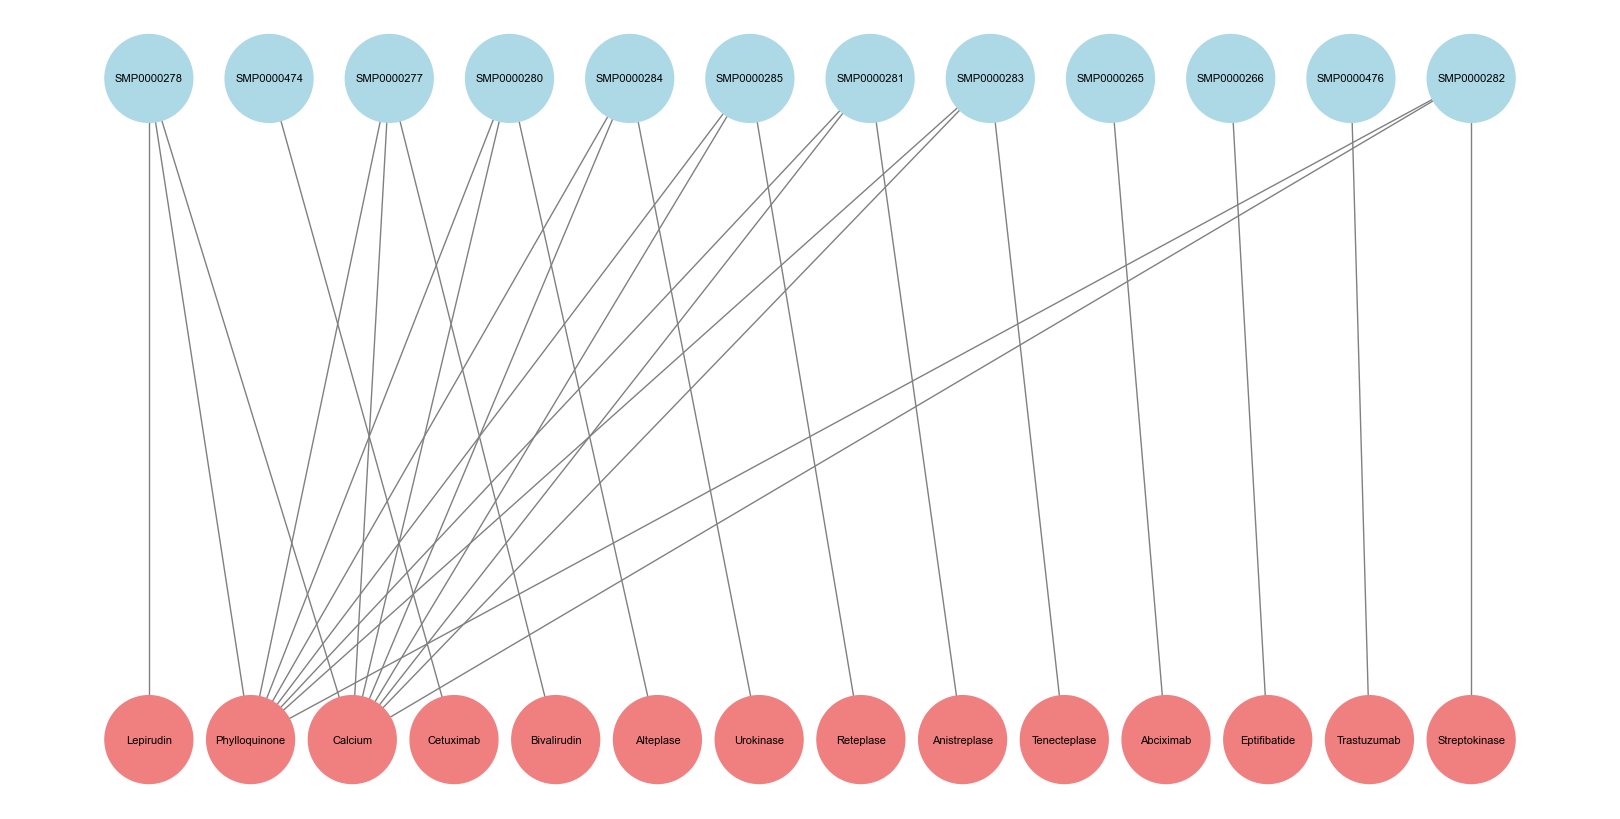

In [289]:
# Empty graph
B = nx.Graph()

# first we designate the id nodes as left
left_nodes = [node for node in pathways['smpdb-id']]

# we add left nodes with the 'bipartite' tag set to 0 to represent one side of the graph
B.add_nodes_from(left_nodes, bipartite=0)

# we add the edges, which adds missing right nodes
edges = [(name, drug) for name, drugs in zip(pathways['smpdb-id'], pathways['drugs']) for drug in drugs]
B.add_edges_from(edges)

# calculate a bipartite layout for the nodes
pos = nx.bipartite_layout(B, left_nodes)

# Swap x and y coordinates to make vertical stacks horizontal
for node in pos:
    pos[node] = (pos[node][1], -pos[node][0])  # Swap x and y coordinates

# draw the graph
plt.figure(figsize=(16, 8))
nx.draw(B, pos, with_labels=True,
        node_color=['lightblue' if node in left_nodes else 'lightcoral' for node in B.nodes()],
        edge_color='gray', node_size=4000, font_size=8)
plt.show()  # (5) done

In [290]:
boom = pathways.explode('drugs').drop(columns=['smpdb-id', 'name', 'category']).reset_index(drop=True)
boom.rename(columns={'drugs': 'drug'}, inplace=True)
boom

,drug
0,Lepirudin
1,Phylloquinone
2,Calcium
3,Cetuximab
4,Bivalirudin
5,Phylloquinone
6,Calcium
7,Alteplase
8,Phylloquinone
9,Calcium


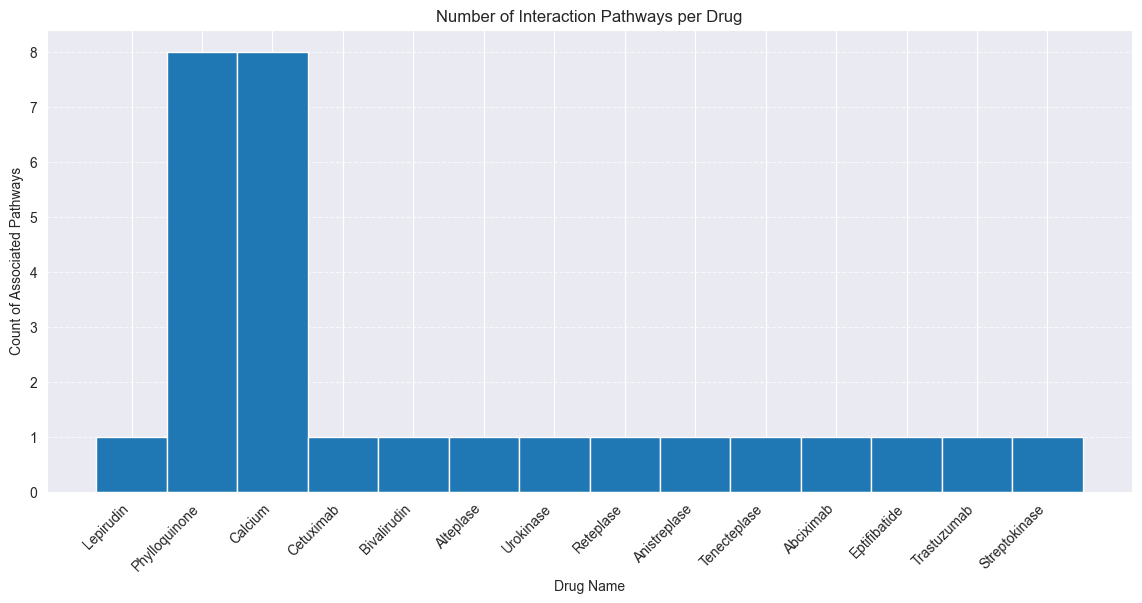

In [291]:
import numpy as np
# Plot a bar chart
plt.figure(figsize=(14, 6))

# Create bin edges that align with the data
bin_edges = np.arange(len(boom['drug'].unique()) + 1) - 0.5

# Plot histogram with aligned bins
plt.hist(boom, bins=bin_edges)

# Customize plot
plt.xlabel('Drug Name')
plt.ylabel('Count of Associated Pathways')
plt.title('Number of Interaction Pathways per Drug')

# Set x-ticks at the center of each bin
plt.xticks(range(len(boom['drug'].unique())), boom['drug'].unique(), rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()      # (6) done

I mean it's alright, but it's annoying to need to do all that stuff with x ticks \
 therefore like this one better, but sadly it's not a histogram:

In [292]:
# firstly we aggregate the data ourselves

pathway_count = boom['drug'].value_counts()
pathway_count.sort_index(inplace=True)
pathway_count

drug
Abciximab        1
Alteplase        1
Anistreplase     1
Bivalirudin      1
Calcium          8
Cetuximab        1
Eptifibatide     1
Lepirudin        1
Phylloquinone    8
Reteplase        1
Streptokinase    1
Tenecteplase     1
Trastuzumab      1
Urokinase        1
Name: count, dtype: int64

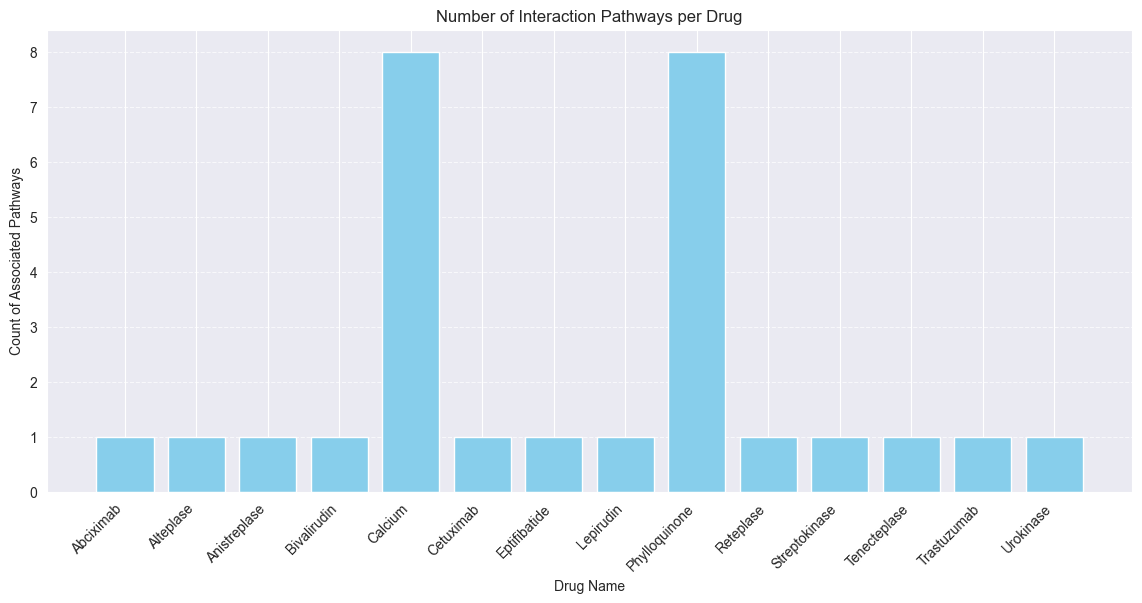

In [293]:
# then we plot it as a bar chart
plt.figure(figsize=(14, 6))

plt.bar(pathway_count.index, pathway_count.values, color='skyblue')

# Customize plot
plt.xlabel('Drug Name')
plt.ylabel('Count of Associated Pathways')
plt.title('Number of Interaction Pathways per Drug')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability -> align them to they still match
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()      # (6) done better ?

In [294]:
targets = []

for drug in root:
    for target in drug.find('ns:targets', ns):
        row = {
            'drug id': drug.find('ns:drugbank-id', ns).text,
            'target id': target.find('ns:id', ns).text,
        }
        poly = target.find('ns:polypeptide', ns)
        if poly is not None:
            row['source'] = poly.get('source')
            row['source id'] = poly.get('id')
            row['polypeptide name'] = poly.find('ns:name', ns).text
            row['gene name'] = poly.find('ns:gene-name', ns).text

            # GenAtlas // just getting the target.gene-name would probably be better since it's the same
            for e_id in poly.find('ns:external-identifiers', ns):
                if e_id[0].text == 'GenAtlas' :
                    row['GenAtlas ID'] = e_id[1].text
                    break

            row['chromosome location'] = poly.find('ns:chromosome-location', ns).text
            row['cellular location'] = poly.find('ns:cellular-location', ns).text

        targets.append(row)

targets = pd.DataFrame(targets)

targets # (7) done

,drug id,target id,source,source id,polypeptide name,gene name,GenAtlas ID,chromosome location,cellular location
0,DB00001,BE0000048,Swiss-Prot,P00734,Prothrombin,F2,F2,11,Secreted
1,DB00002,BE0000767,Swiss-Prot,P00533,Epidermal growth factor receptor,EGFR,EGFR,7,Cell membrane
2,DB00002,BE0000901,Swiss-Prot,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,FCGR3B,1,Cell membrane
3,DB00002,BE0002094,Swiss-Prot,P02745,Complement C1q subcomponent subunit A,C1QA,C1QA,1,Secreted
4,DB00002,BE0002095,Swiss-Prot,P02746,Complement C1q subcomponent subunit B,C1QB,C1QB,1,Secreted
...,...,...,...,...,...,...,...,...,...
262,DB00107,BE0000844,Swiss-Prot,P30559,Oxytocin receptor,OXTR,OXTR,3,Cell membrane
263,DB00108,BE0000590,Swiss-Prot,P13612,Integrin alpha-4,ITGA4,ITGA4,2,Membrane
264,DB00108,BE0000901,Swiss-Prot,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,FCGR3B,1,Cell membrane
265,DB00108,BE0000710,Swiss-Prot,P12314,High affinity immunoglobulin gamma Fc receptor I,FCGR1A,FCGR1A,1,Cell membrane


In [295]:
locations = targets['cellular location'].value_counts()
locations

cellular location
Cell membrane                                                    104
Secreted                                                          61
Membrane                                                          56
Cytoplasm                                                          9
Cytoplasmic vesicle                                                4
Endoplasmic reticulum membrane                                     4
Endoplasmic reticulum lumen                                        3
Peroxisome                                                         1
Endoplasmic reticulum-Golgi intermediate compartment membrane      1
Endoplasmic reticulum-Golgi intermediate compartment               1
Cytoplasmic                                                        1
Nucleus                                                            1
Late endosome membrane                                             1
Mitochondrion matrix                                               1
Name: count, dty

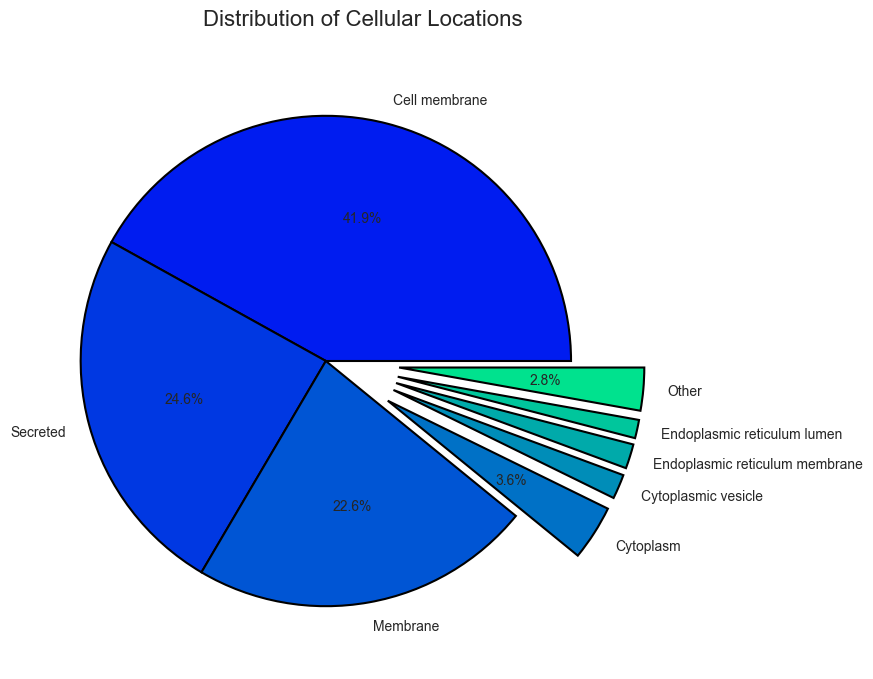

In [296]:
# repeat the last step so that if we run this cell more than once it doesn't mess itself up (useful for testing)
locations = targets['cellular location'].value_counts()

# Define a threshold for grouping small slices
threshold = 1  # You can adjust this value (e.g., 1%, 2%, etc.)

# Group small slices into "Other"
small_slices = locations[locations / locations.sum() * 100 < threshold]
locations = locations[locations / locations.sum() * 100 >= threshold]
locations['Other'] = small_slices.sum()

threshold = 20
# Create an explosion array
explode = [0.3 if (value / locations.sum() * 100) < threshold else 0 for value in locations]

# Custom function to display percentages only if they are greater than 3%
def show_greater_than_3(pct):
    return f'{pct:.1f}%' if pct > 2 else ''

# nice colors
colors = ['#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80', ]

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Set the size of the chart
plt.pie(
    locations,
    labels=locations.index,  # Use the unique locations as labels
    autopct=show_greater_than_3,
    # colors=plt.cm.Pastel1.colors,  # Use a pastel color scheme
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Add edges to the slices
    explode = explode
)

# Add a title
plt.title('Distribution of Cellular Locations', fontsize=16, pad=20)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()      # (8) done

In [297]:
drug_approval_status = []

# Use the namespace to access elements
ns = {'ns': 'http://www.drugbank.ca'}

for drug in root:
    row = {
        'drug id': drug.find('ns:drugbank-id', ns).text,
        'name': drug.find('ns:name', ns).text,
    }
    statuses = {t.text.lower() for t in drug.find("ns:groups", ns)}

    if 'approved' in statuses:
        row['approved'] = True
    if 'withdrawn' in statuses:
        row['withdrawn'] = True
    if 'experimental' in statuses:
        row['experimental'] = True
    if 'investigational' in statuses:
        row['investigational'] = True
    if 'vet_approved' in statuses:
        row['vet_approved'] = True

    drug_approval_status.append(row)

drug_approval_status = pd.DataFrame(drug_approval_status)
drug_approval_status

,drug id,name,approved,withdrawn,investigational,vet_approved,experimental
0,DB00001,Lepirudin,True,True,NaN,NaN,NaN
1,DB00002,Cetuximab,True,NaN,NaN,NaN,NaN
2,DB00003,Dornase alfa,True,NaN,NaN,NaN,NaN
3,DB00004,Denileukin diftitox,True,NaN,True,NaN,NaN
4,DB00005,Etanercept,True,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...
95,DB00104,Octreotide,True,NaN,True,NaN,NaN
96,DB00105,Interferon alfa-2b,True,NaN,NaN,NaN,NaN
97,DB00106,Abarelix,True,True,True,NaN,NaN
98,DB00107,Oxytocin,True,NaN,NaN,True,NaN


In [298]:
# NaN -> False
DAS_numeric = drug_approval_status.iloc[:, 2:].astype('boolean').fillna(False)

# True -> 1, False -> 0
DAS_numeric = DAS_numeric.astype('int')

DAS_numeric

,approved,withdrawn,investigational,vet_approved,experimental
0,1,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
95,1,0,1,0,0
96,1,0,0,0,0
97,1,1,1,0,0
98,1,0,0,1,0


In [299]:
# sum the columns
summary = DAS_numeric.sum().reset_index()
summary.columns = ["status", "number of drugs"]

# summary.loc[len(summary)] = ['approved_not_withdrawn', len(approved_not_withdrawn)]

summary

,status,number of drugs
0,approved,98
1,withdrawn,10
2,investigational,54
3,vet_approved,4
4,experimental,3


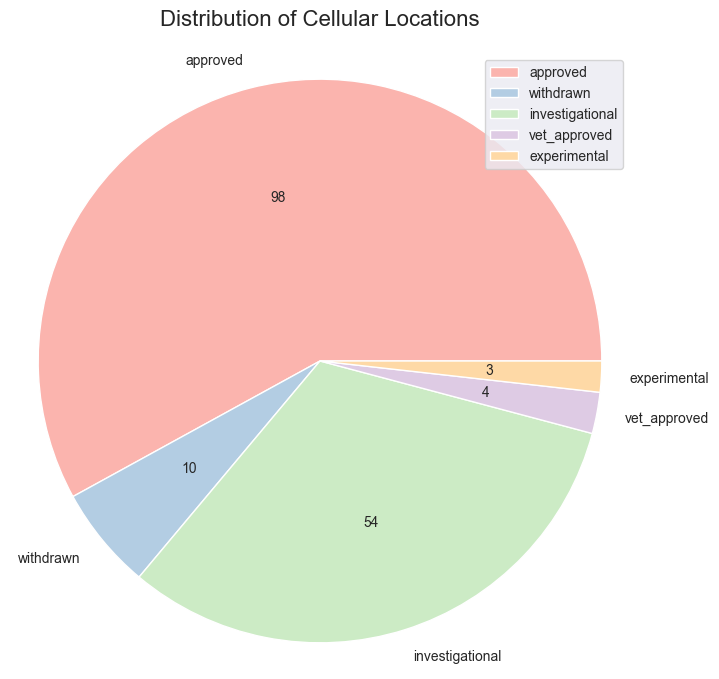

In [300]:
# Function to show actual values
def absolute_value(val):
    a = round(val / 100 * sum(summary['number of drugs']))
    return f"{a}"  # Return as string

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Set the size of the chart
plt.pie(
    summary['number of drugs'],
    labels=summary['status'],
    colors=plt.cm.Pastel1.colors,  # Use a pastel color scheme
    autopct=absolute_value,
)

# Add a title
plt.title('Distribution of Cellular Locations', fontsize=16, pad=20)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')
plt.legend(loc='upper right')

# Display the chart
plt.show()

In [301]:
approved_not_withdrawn = drug_approval_status[(drug_approval_status["approved"] == True) & ~(drug_approval_status["withdrawn"] == True)]
approved_not_withdrawn

,drug id,name,approved,withdrawn,investigational,vet_approved,experimental
1,DB00002,Cetuximab,True,NaN,NaN,NaN,NaN
2,DB00003,Dornase alfa,True,NaN,NaN,NaN,NaN
3,DB00004,Denileukin diftitox,True,NaN,True,NaN,NaN
4,DB00005,Etanercept,True,NaN,True,NaN,NaN
5,DB00006,Bivalirudin,True,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...
94,DB00103,Agalsidase beta,True,NaN,True,NaN,NaN
95,DB00104,Octreotide,True,NaN,True,NaN,NaN
96,DB00105,Interferon alfa-2b,True,NaN,NaN,NaN,NaN
98,DB00107,Oxytocin,True,NaN,NaN,True,NaN


In [302]:
print(len(approved_not_withdrawn))  # (9) done

89


In [303]:
drug_interactions = []

for drug in root:
    for interaction in drug.find("ns:drug-interactions", ns):
        row = {
            'drug name': drug.find("ns:name", ns).text,
            'drug id': drug.find("ns:drugbank-id", ns).text,
            'interacts with': interaction.find("ns:name", ns).text,
            'interactee id': interaction.find("ns:drugbank-id", ns).text,
            'interaction description': interaction.find("ns:description", ns).text,
        }

        drug_interactions.append(row)

drug_interactions = pd.DataFrame(drug_interactions)
drug_interactions  # (10) done ?

,drug name,drug id,interacts with,interactee id,interaction description
0,Lepirudin,DB00001,Apixaban,DB06605,Apixaban may increase the anticoagulant activi...
1,Lepirudin,DB00001,Dabigatran etexilate,DB06695,Dabigatran etexilate may increase the anticoag...
2,Lepirudin,DB00001,Dasatinib,DB01254,The risk or severity of bleeding and hemorrhag...
3,Lepirudin,DB00001,Deferasirox,DB01609,The risk or severity of gastrointestinal bleed...
4,Lepirudin,DB00001,Ursodeoxycholic acid,DB01586,The risk or severity of bleeding and bruising ...
...,...,...,...,...,...
50683,Natalizumab,DB00108,Etrasimod,DB14766,The risk or severity of immunosuppression can ...
50684,Natalizumab,DB00108,Toripalimab,DB15043,The risk or severity of adverse effects can be...
50685,Natalizumab,DB00108,"Chikungunya vaccine (live, attenuated)",DB18701,The risk or severity of infection can be incre...
50686,Natalizumab,DB00108,SARS-CoV-2 virus recombinant spike (S) protein...,DB18705,The therapeutic efficacy of SARS-CoV-2 virus r...


In [304]:
# def draw_gene_relations(gene_name):

gene_name = 'F2'
attackers = targets[targets['gene name'] == gene_name]['drug id'].copy()
attackers

0      DB00001
22     DB00006
159    DB00055
251    DB00100
Name: drug id, dtype: object

In [305]:
attacker_interactions = drug_interactions[drug_interactions['drug id'].isin(attackers)].copy()
attacker_interactions = attacker_interactions[attacker_interactions['interactee id'].isin(attackers)]
attacker_interactions

,drug name,drug id,interacts with,interactee id,interaction description
272,Lepirudin,DB00001,Coagulation Factor IX (Recombinant),DB00100,The therapeutic efficacy of Coagulation Factor...
353,Lepirudin,DB00001,Bivalirudin,DB00006,The risk or severity of bleeding can be increa...
390,Lepirudin,DB00001,Drotrecogin alfa,DB00055,The risk or severity of bleeding can be increa...
2388,Bivalirudin,DB00006,Coagulation Factor IX (Recombinant),DB00100,The therapeutic efficacy of Coagulation Factor...
2505,Bivalirudin,DB00006,Drotrecogin alfa,DB00055,The risk or severity of bleeding can be increa...
2518,Bivalirudin,DB00006,Lepirudin,DB00001,The risk or severity of bleeding can be increa...
26893,Drotrecogin alfa,DB00055,Coagulation Factor IX (Recombinant),DB00100,The therapeutic efficacy of Coagulation Factor...
26969,Drotrecogin alfa,DB00055,Bivalirudin,DB00006,The risk or severity of bleeding can be increa...
27018,Drotrecogin alfa,DB00055,Lepirudin,DB00001,The risk or severity of bleeding can be increa...
48070,Coagulation Factor IX (Recombinant),DB00100,Lepirudin,DB00001,The therapeutic efficacy of Coagulation Factor...


In [306]:
def drop_non_unique_interactions(interactions):
    df = interactions

    # rename columns for simplicity
    df.rename(columns={'drug name': 'Drug1', 'drug id': 'ID1', 'interacts with': 'Drug2', 'interactee id': 'ID2', 'interaction description': 'desc'}, inplace=True)

    # if needed swap drug1 with drug2 so that id1 is always smaller than id2
    df[['Drug1', 'ID1', 'Drug2', 'ID2', 'desc']] = df.apply(
        lambda x: (x[['Drug1', 'ID1', 'Drug2', 'ID2', 'desc']].values if x['ID1'] < x['ID2'] else x[['Drug2', 'ID2', 'Drug1', 'ID1', 'desc']].values),
        axis=1, result_type='expand'
    )

    # Drop duplicate pairs and reset the index
    df.drop_duplicates(subset=['Drug1', 'Drug2'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [307]:
wow = drop_non_unique_interactions(attacker_interactions)
wow

,Drug1,ID1,Drug2,ID2,desc
0,Lepirudin,DB00001,Coagulation Factor IX (Recombinant),DB00100,The therapeutic efficacy of Coagulation Factor...
1,Lepirudin,DB00001,Bivalirudin,DB00006,The risk or severity of bleeding can be increa...
2,Lepirudin,DB00001,Drotrecogin alfa,DB00055,The risk or severity of bleeding can be increa...
3,Bivalirudin,DB00006,Coagulation Factor IX (Recombinant),DB00100,The therapeutic efficacy of Coagulation Factor...
4,Bivalirudin,DB00006,Drotrecogin alfa,DB00055,The risk or severity of bleeding can be increa...
5,Drotrecogin alfa,DB00055,Coagulation Factor IX (Recombinant),DB00100,The therapeutic efficacy of Coagulation Factor...


In [343]:
drug_to_drug = list(zip(wow['Drug1'], wow['Drug2']))
drug_to_drug

[('Lepirudin', 'Coagulation Factor IX (Recombinant)'),
 ('Lepirudin', 'Bivalirudin'),
 ('Lepirudin', 'Drotrecogin alfa'),
 ('Bivalirudin', 'Coagulation Factor IX (Recombinant)'),
 ('Bivalirudin', 'Drotrecogin alfa'),
 ('Drotrecogin alfa', 'Coagulation Factor IX (Recombinant)')]

In [347]:
attacker_products = products[products['id'].isin(attackers)].copy()
attacker_products.drop_duplicates(subset=['id', 'name'], inplace=True)
attacker_products.reset_index(drop=True, inplace=True)
attacker_products


,id,name,labeller,ndc-product-code,dosage-form,route,strength,country,source
0,DB00001,Refludan,Bayer,50419-150,Powder,Intravenous,50 mg/1mL,US,FDA NDC
1,DB00006,Angiomax,Cardinal Health,55154-2275,"Injection, powder, lyophilized, for solution",Intravenous,250 mg/1,US,FDA NDC
2,DB00006,Angiomax RTU,"MAIA Pharmaceuticals, Inc.",70511-141,"Injection, solution",Intravenous,250 mg/1,US,FDA NDC
3,DB00006,Angiox,The Medicines Company,None,None,Intravenous,250 mg,EU,EMA
4,DB00006,Bivalirudin,"Accord Healthcare, Inc.",16729-275,"Injection, powder, lyophilized, for solution",Intravenous,250 mg/5mL,US,FDA NDC
5,DB00006,Bivalirudin for Injection,Fresenius Kabi,None,"Powder, for solution",Intravenous,250 mg / vial,Canada,DPD
6,DB00006,Bivalirudin in 0.9% Sodium Chloride,Baxter Healthcare Corporation,0338-9572,Injection,Intravenous,250 mg/50mL,US,FDA NDC
7,DB00006,Bivalirudin Injection,Avir Pharma Inc.,None,Solution,Intravenous,5 mg / mL,Canada,DPD
8,DB00006,Bivalirudin RTU,"Athenex Pharmaceutical Division, Llc.",70860-403,"Injection, solution",Intravenous,5 mg/1mL,US,FDA NDC
9,DB00055,Xigris,Eli Lilly & Co. Ltd.,0002-7559,"Injection, powder, lyophilized, for solution",Intravenous,5 mg/2.5mL,US,FDA NDC


In [349]:
attacker_productsXd = attacker_products[['id', 'name']]
attacker_productsXd.loc[:, 'id'] = attacker_productsXd['id'].map(drugs_df['name'])
attacker_productsXd



,id,name
0,Lepirudin,Refludan
1,Bivalirudin,Angiomax
2,Bivalirudin,Angiomax RTU
3,Bivalirudin,Angiox
4,Bivalirudin,Bivalirudin
5,Bivalirudin,Bivalirudin for Injection
6,Bivalirudin,Bivalirudin in 0.9% Sodium Chloride
7,Bivalirudin,Bivalirudin Injection
8,Bivalirudin,Bivalirudin RTU
9,Drotrecogin alfa,Xigris


In [350]:
drug_to_prod = list(zip(attacker_productsXd['id'], attacker_productsXd['name']))
print(len(drug_to_prod))
drug_to_prod

21


[('Lepirudin', 'Refludan'),
 ('Bivalirudin', 'Angiomax'),
 ('Bivalirudin', 'Angiomax RTU'),
 ('Bivalirudin', 'Angiox'),
 ('Bivalirudin', 'Bivalirudin'),
 ('Bivalirudin', 'Bivalirudin for Injection'),
 ('Bivalirudin', 'Bivalirudin in 0.9% Sodium Chloride'),
 ('Bivalirudin', 'Bivalirudin Injection'),
 ('Bivalirudin', 'Bivalirudin RTU'),
 ('Drotrecogin alfa', 'Xigris'),
 ('Drotrecogin alfa', 'Xigris (20mg/vial)'),
 ('Drotrecogin alfa', 'Xigris (5mg/vial)'),
 ('Coagulation Factor IX (Recombinant)', 'BeneFIX'),
 ('Coagulation Factor IX (Recombinant)', 'Benefix'),
 ('Coagulation Factor IX (Recombinant)', 'Benefix - (250iu)'),
 ('Coagulation Factor IX (Recombinant)', 'Benefix - (500iu)'),
 ('Coagulation Factor IX (Recombinant)', 'Benefix -(1000iu)'),
 ('Coagulation Factor IX (Recombinant)', 'Idelvion'),
 ('Coagulation Factor IX (Recombinant)', 'Ixinity'),
 ('Coagulation Factor IX (Recombinant)', 'Rebinyn'),
 ('Coagulation Factor IX (Recombinant)', 'Rixubis')]

In [355]:
atackers_list = list(attackers.copy().map(drugs_df['name']))
atackers_list

['Lepirudin',
 'Bivalirudin',
 'Drotrecogin alfa',
 'Coagulation Factor IX (Recombinant)']

In [356]:
product_list = list(attacker_products['name'].copy())
product_list

['Refludan',
 'Angiomax',
 'Angiomax RTU',
 'Angiox',
 'Bivalirudin',
 'Bivalirudin for Injection',
 'Bivalirudin in 0.9% Sodium Chloride',
 'Bivalirudin Injection',
 'Bivalirudin RTU',
 'Xigris',
 'Xigris (20mg/vial)',
 'Xigris (5mg/vial)',
 'BeneFIX',
 'Benefix',
 'Benefix - (250iu)',
 'Benefix - (500iu)',
 'Benefix -(1000iu)',
 'Idelvion',
 'Ixinity',
 'Rebinyn',
 'Rixubis']

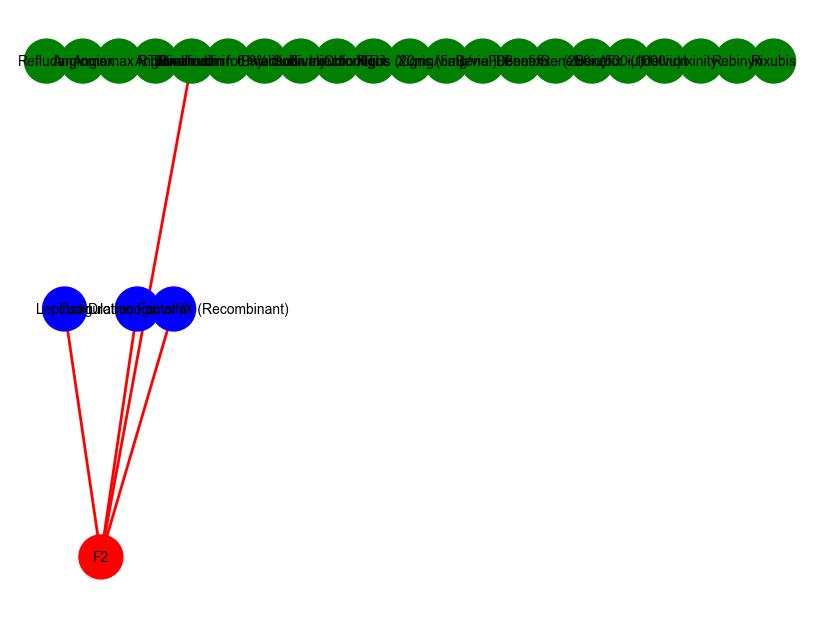

In [358]:
# Create a graph
G = nx.Graph()

# Add nodes
G.add_node(gene_name, type="gene")

for a in atackers_list:
    G.add_node(a, type="drug")
for p in product_list:
    G.add_node(p, type="product")

# Add edges with relationship labels
edges = {
    "gene_target": [(gene_name, a) for a in atackers_list],
    # "drug_interaction": [("Drug1", "Drug2"), ("Drug2", "Drug3"), ("Drug3", "Drug1")],
    # "contains_drug": [("Drug1", "Product1"), ("Drug2", "Product2"), ("Drug3", "Product3"), ("Drug3", "Product4")],
    # "same_company": [("Product1", "Product2"), ("Product3", "Product4")]
}

# Define edge colors
edge_colors = {
    "gene_target": "red",
    "drug_interaction": "blue",
    "contains_drug": "green",
    "same_company": "purple"
}

# Define node colors
color_map = []
for node in G:
    if G.nodes[node]["type"] == "gene":
        color_map.append("red")
    elif G.nodes[node]["type"] == "drug":
        color_map.append("blue")
    else:
        color_map.append("green")

# Define positions for an upside-down triangle shape
pos = {gene_name: (0, -1)}  # Gene at the bottom
pos.update({atackers_list[i]: (i - 1, 0) for i in range(len(atackers_list))})  # Drugs in the middle
pos.update({product_list[i]: (i - 1.5, 1) for i in range(len(product_list))})  # Products at the top

# Draw nodes
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=1000, edge_color='gray', font_size=10)

# Draw edges with specific colors
for relation, edge_list in edges.items():
    nx.draw_networkx_edges(G, pos, edgelist=edge_list, edge_color=edge_colors[relation], width=2)

# # Create a legend
# from matplotlib.lines import Line2D
# legend_elements = [
#     Line2D([0], [0], color="red", lw=2, label="Drug targets Gene"),
#     Line2D([0], [0], color="blue", lw=2, label="Drugs interact"),
#     Line2D([0], [0], color="green", lw=2, label="Product contains Drug"),
#     Line2D([0], [0], color="purple", lw=2, label="Products made by same company")
# ]
# plt.legend(handles=legend_elements, loc="lower right")

plt.show()

im not gonna make it in time today so ill resume it after im done with exams and the task for PW